In [12]:
import h5py
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score, accuracy_score
import plotting
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc

In [2]:
f = h5py.File('./data/train_no_pile_100000a.h5','r')
x,y = f['features'][:], f['targets'][:]
ibg, isig = np.where(y == 0)[0], np.where(y == 1)[0]
xbg, ybg = x[ibg], y[ibg]
xsig, ysig = x[isig], y[isig]

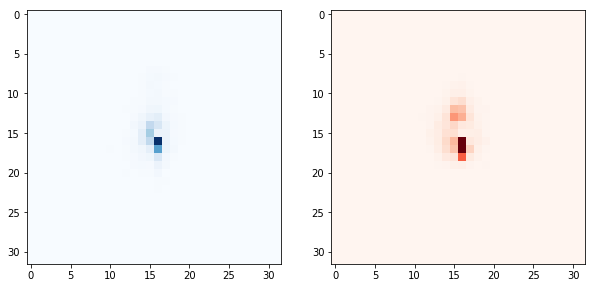

In [4]:
plotting.plot2_nAgg(0,1000,xbg,xsig,100*400,"traindata.png")

In [5]:
def run_kmeans(x):
    kmeans = KMeans(n_clusters=2, n_init=20, n_jobs=1)
    y_hat = kmeans.fit_predict(x)
    #fpr, tpr, thresholds = metrics.roc_curve(y, y_hat, pos_label=2)
    return y_hat

In [9]:
y_hat = run_kmeans(x.reshape(x.shape[0],1024))

In [10]:
print("AUC:", roc_auc_score(y, y_hat))
print("acc:", accuracy_score(y,y_hat))

AUC: 0.7580113395363289
acc: 0.758


In [13]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y,y_hat)
    roc_auc[i] = auc(fpr[i], tpr[i])
print(roc_auc)

{0: 0.7580113395363289, 1: 0.7580113395363289}


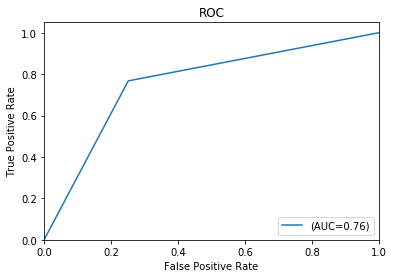

In [14]:
plt.figure()   
plt.plot(fpr[1], tpr[1],label="(AUC={:.2f})".format(roc_auc[0]))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig("kmeansroc.png")
plt.show()

In [16]:
print(y_hat[:100])

[0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0
 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0]
